In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We choose to visualize data from the 2021 MLB season, looking at pitcher stats before an after an enforcement about rules referring to "sticky stuff" that would likely affect pitcher performance. These substances improve a pitcher's grip on the ball, which helps to increase spin rate, which is associated with movement on breaking pitches. We are interested in the effect that this might have on a pitcher's overall strikeout rate - their K/9, or strikeouts per nine innings. We got our data from FanGraphs, a baseball stats website, where each row is a player and each column is a unique stat. 

In [20]:
filepath = '/homes/jasonmeyer/CS240/visual_project/Data/'
#filepath = 'c:/Users/jason/Documents/CS240/sticky_stuff/Data/'
k9_before = np.loadtxt(filepath + 'k9_before.csv', delimiter = ",", skiprows = 1, usecols = 8, converters = {8:lambda x : x[1:-1]})
k9_before_labels = np.loadtxt(filepath + 'k9_before.csv', delimiter = ",", dtype = "str", skiprows = 1, usecols = 0, converters = {0:lambda x : x[1:-1]})



In [21]:
k9_after = np.loadtxt(filepath + 'k9_after.csv', delimiter = ",", skiprows = 1, usecols = 8, converters = {8:lambda x : x[1:-1]})
k9_after_labels = np.loadtxt(filepath + 'k9_after.csv', delimiter = ",", dtype = "str", skiprows = 1, usecols = 0, converters = {0:lambda x : x[1:-1]})


array(['Jacob deGrom', 'Zack Wheeler', 'Gerrit Cole', 'Brandon Woodruff',
       'Kevin Gausman', 'Trevor Rogers', 'Clayton Kershaw',
       'Tyler Glasnow', 'Nathan Eovaldi', 'Taijuan Walker',
       'Shane Bieber', 'Max Scherzer', 'Yu Darvish', 'Zach Eflin',
       'Aaron Nola', 'Julio Urias', 'Lance Lynn', 'Freddy Peralta',
       'Sean Manaea', 'Chris Bassitt', 'Joe Musgrove', 'Tyler Mahle',
       'German Marquez', 'Sandy Alcantara', 'Kyle Gibson', 'Trevor Bauer',
       'Pablo Lopez', 'Jordan Montgomery', 'Matthew Boyd',
       'Austin Gomber', 'John Means', 'Walker Buehler', 'Jose Berrios',
       'Ian Anderson', 'Zack Greinke', 'Anthony DeSclafani',
       'Frankie Montas', 'Cole Irvin', 'Marcus Stroman', 'Mike Minor',
       'Lucas Giolito', 'Garrett Richards', 'Steven Matz',
       'Charlie Morton', 'Merrill Kelly', 'Hyun-Jin Ryu', 'Nick Pivetta',
       'Antonio Senzatela', 'Aaron Civale', 'Dallas Keuchel',
       'Luis Castillo', 'Robbie Ray', 'Adam Wainwright', 'Zach Davie

In [22]:
print("length before = " + str(len(k9_before)))
print("length after = " + str(len(k9_after)))

length before = 63
length after = 40


In [23]:
k9_before_filtered = k9_before[[name in k9_after_labels for name in k9_before_labels]]
print(len(k9_before_filtered))
k9_after_filtered = k9_after[[name in k9_before_labels for name in k9_after_labels]]

27


We have to filter the data so that each one contains the same players, and also sort so that each data point from the two arrays refers to the same player in each half of the season.

In [24]:
#Check to see if the names are the same?
#Need to filter labels first
before_labels_filtered = k9_before_labels[[name in k9_after_labels for name in k9_before_labels]]
after_labels_filtered = k9_after_labels[[name in k9_before_labels for name in k9_after_labels]]

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False])

In [39]:
k9_before_sorted = k9_before_filtered[before_labels_filtered.argsort()]
k9_after_sorted = k9_after_filtered[after_labels_filtered.argsort()]
#before_labels_filtered == after_labels_filtered
labels = before_labels_filtered.copy()
labels.sort()


We visualize this data as a scatter plot, where the x-axis is each player's K-9 before the sticky stuff rule change, and the y-axis is each player's K/9 after the rule change. We place a 45 degree line in the middle to indicate where players should be if the change did not affect them at all. Players below the line had their strikeout performance decrease after the rule change, possibly due to a new lack of grip, whereas those above the line actually improved after the rule change. 

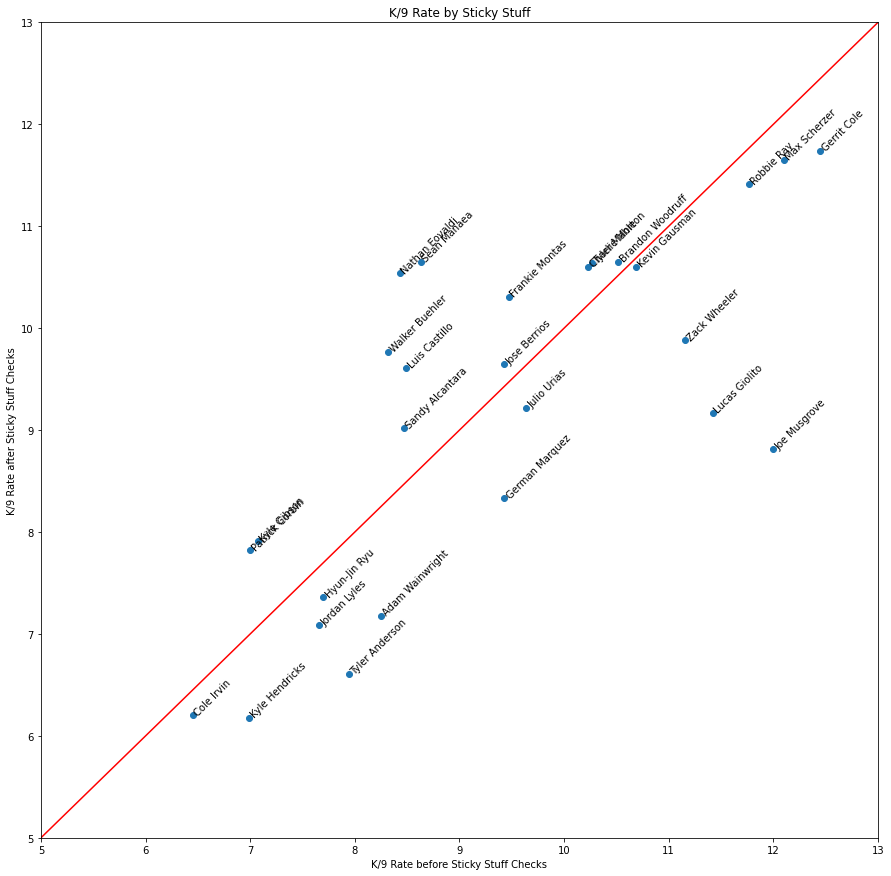

In [68]:
fig,ax = plt.subplots(figsize = (15,15))
#fig.figsize = (12,12)
ax.scatter(k9_before_sorted, k9_after_sorted)
ax.set(xlim=(5, 13), ylim=(5, 13))
plt.xlabel("K/9 Rate before Sticky Stuff Checks")
plt.ylabel("K/9 Rate after Sticky Stuff Checks")
plt.title("K/9 Rate by Sticky Stuff")

ax.axline([6,6], [12,12], color = 'r')
for i, label in enumerate(labels):
    plt.text(k9_before_sorted[i], k9_after_sorted[i], label, rotation = 45)